In [1]:
import warnings; warnings.simplefilter('ignore')
try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !wget -P data/ https://raw.githubusercontent.com/nayorans/KodingData-DataScience-Bootcamp/refs/heads/main/employee_productivity.csv
    !pip install darts nolds tsfresh seaborn ipywidgets utils --q
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2025-09-26 21:29:01--  https://raw.githubusercontent.com/nayorans/KodingData-DataScience-Bootcamp/refs/heads/main/employee_productivity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2726 (2.7K) [text/plain]
Saving to: ‘data/employee_productivity.csv’

employee_productivi 100%[===================>]   2.66K  --.-KB/s    in 0s      

2025-09-26 21:29:01 (47.0 MB/s) - ‘data/employee_productivity.csv’ saved [2726/2726]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data/employee_productivity.csv')
df.head(5)

,EmployeeID,Department,ProductivityScore
0,1,HR,72.483571
1,2,HR,69.308678
2,3,HR,73.238443
3,4,HR,77.615149
4,5,HR,68.829233


In [5]:
df.describe()

,EmployeeID,ProductivityScore
count,100.000000,100.000000
mean,50.500000,68.810672
std,29.011492,7.342543
min,1.000000,51.282309
25%,25.750000,64.139332
50%,50.500000,68.755353
75%,75.250000,73.388125
max,100.000000,84.387862


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         100 non-null    int64  
 1   Department         100 non-null    object 
 2   ProductivityScore  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [11]:
df['Department'].unique()

array(['HR', 'Finance', 'IT', 'Marketing'], dtype=object)

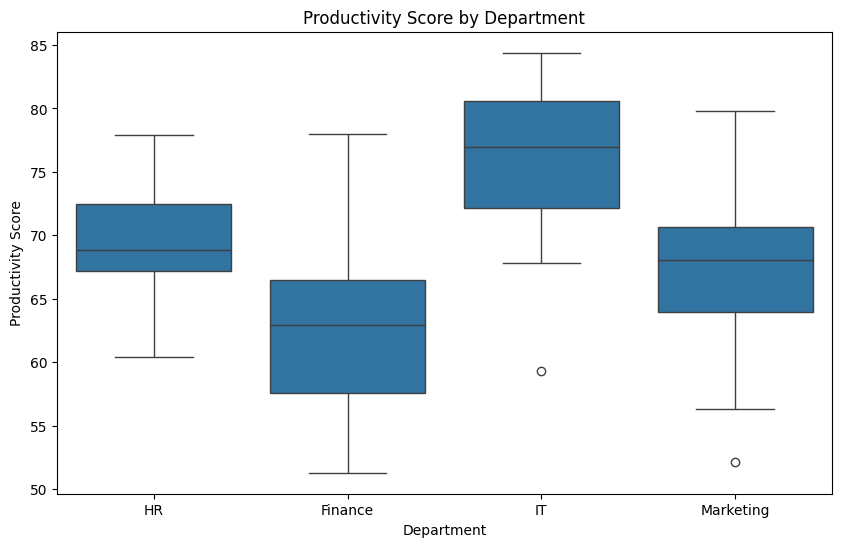

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='ProductivityScore', data=df)
plt.title('Productivity Score by Department')
plt.xlabel('Department')
plt.ylabel('Productivity Score')
plt.show()

In [14]:
H0 = 'There is no significant difference in the mean productivity scores among the departments.'
H1 = 'There is a significant difference in the mean productivity scores among the departments.'

In [16]:
from scipy import stats

# Extract productivity scores for each department
hr_scores = df[df['Department'] == 'HR']['ProductivityScore']
finance_scores = df[df['Department'] == 'Finance']['ProductivityScore']
it_scores = df[df['Department'] == 'IT']['ProductivityScore']
marketing_scores = df[df['Department'] == 'Marketing']['ProductivityScore']

# Perform One-Way ANOVA test
f_statistic, p_value = stats.f_oneway(hr_scores, finance_scores, it_scores, marketing_scores)

# Print the results
print("One-Way ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

One-Way ANOVA Test Results:
F-statistic: 20.1637
P-value: 0.0000


**Interpretasi Hasil**  

Hipotesis Nol (H0) ditolak karena
p-value < alpha (0.05).

Sehingga terdapat cukup bukti untuk membuktikan *adanya perbedaan signifikan pada rata-rata skor produktivitas antardepartemen.*

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
Finance        HR   6.1945 0.0017   1.8757 10.5134   True
Finance        IT  12.6486    0.0   8.3298 16.9675   True
Finance Marketing   4.4478  0.041   0.1289  8.7667   True
     HR        IT   6.4541  0.001   2.1352  10.773   True
     HR Marketing  -1.7467 0.7161  -6.0656  2.5722  False
     IT Marketing  -8.2008    0.0 -12.5197 -3.8819   True
---------------------------------------------------------


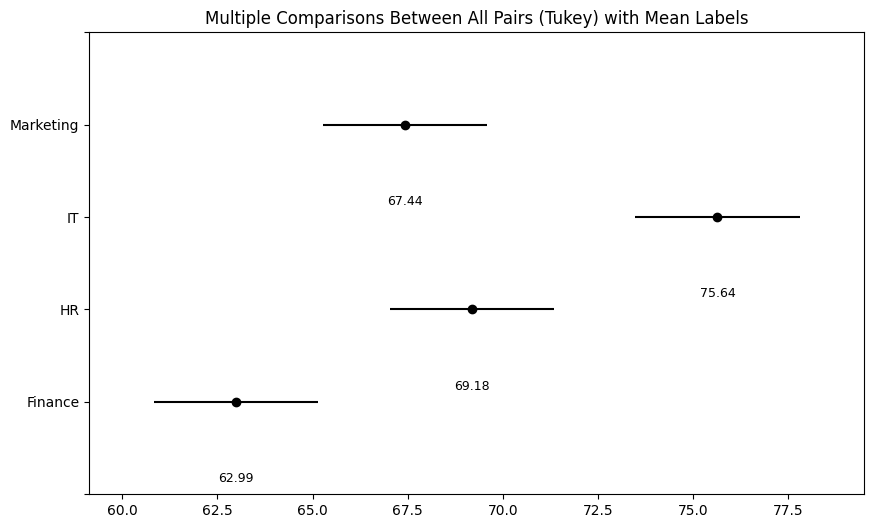

In [25]:
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc

# Lakukan Tukey HSD
alpha = 0.05
m_comp = mc.pairwise_tukeyhsd(endog=df['ProductivityScore'],
                              groups=df['Department'],
                              alpha=alpha)
print(m_comp)

# Buat plot Tukey HSD
fig = m_comp.plot_simultaneous(comparison_name=None)
ax = plt.gca()

# Ambil rata-rata setiap kelompok
means = df.groupby("Department")["ProductivityScore"].mean()
groups = means.index.tolist()

# Ambil posisi titik (y) di plot
yticks = ax.get_yticks()

# Tambahkan teks mean di atas titik hitam
for y, g in zip(yticks, groups):
    ax.text(means[g], y+0.1, f"{means[g]:.2f}",
            ha='center', va='bottom', fontsize=9, color="black")

plt.title("Multiple Comparisons Between All Pairs (Tukey) with Mean Labels")
plt.show()

Note:  

meandiff = selisih rata-rata antar kelompok.

p-adj = p-value yang sudah disesuaikan.

lower dan upper = batas bawah dan atas dari interval kepercayaan 95%.

reject = apakah perbedaan signifikan (True = signifikan, False = tidak signifikan).




**Interpretasi Hasil**  

Berdasarkan hasil yang tercantum dalam tabel, hampir semua pasangan kelompok berbeda signifikan (True), kecuali HR dengan Marketing (False).

Dapat dilihat juga pada grafik, posisi HR dan Marketing berdekatan dan intervalnya saling overlap yang menandakan bahwa rata-rata skor produktivitas antara dua departemen ini tidak berbeda signifikan.